In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, accuracy_score, recall_score, precision_recall_curve, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelBinarizer, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, learning_curve
import imblearn


In [2]:
df = pd.read_csv('churndata_processed.csv')

In [3]:
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [6]:
df.describe()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.433551,0.421837,0.241358,0.286668,0.344881,0.343888,0.290217,0.673719,0.377396,0.592219,...,0.390317,0.054664,0.234559,0.430924,0.216669,0.073832,0.116996,0.058924,0.085475,0.114298
std,0.398231,0.493888,0.240223,0.452237,0.475363,0.475038,0.453895,0.468885,0.424234,0.491457,...,0.487856,0.227340,0.423753,0.495241,0.412004,0.261516,0.321438,0.235499,0.279607,0.318195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,1.000000,0.317647,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.columns

Index(['months', 'multiple', 'gb_mon', 'security', 'backup', 'protection',
       'support', 'unlimited', 'contract', 'paperless', 'monthly',
       'satisfaction', 'churn_value', 'payment_Credit Card',
       'payment_Mailed Check', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_None', 'offer_Offer A',
       'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   multiple                   7043 non-null   int64  
 2   gb_mon                     7043 non-null   float64
 3   security                   7043 non-null   int64  
 4   backup                     7043 non-null   int64  
 5   protection                 7043 non-null   int64  
 6   support                    7043 non-null   int64  
 7   unlimited                  7043 non-null   int64  
 8   contract                   7043 non-null   float64
 9   paperless                  7043 non-null   int64  
 10  monthly                    7043 non-null   float64
 11  satisfaction               7043 non-null   float64
 12  churn_value                7043 non-null   int64  
 13  payment_Credit Card        7043 non-null   int64

In [16]:
df['churn_value'].tail()

7038    0
7039    0
7040    0
7041    0
7042    0
Name: churn_value, dtype: int64

In [17]:
X = df.drop(columns=['churn_value'], axis=1)
y = df[['churn_value']]

(7043, 22) (7043, 1)


In [22]:
corr = df.corr()
corr

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
months,1.000000,0.321235,0.046863,0.315527,0.349682,0.350511,0.310377,0.031219,0.629463,0.003924,...,0.055491,-0.123784,0.007804,0.029646,-0.037735,0.401638,0.340577,-0.026761,-0.234338,-0.391121
multiple,0.321235,1.000000,0.091679,0.098108,0.202237,0.201137,0.100571,0.159669,0.120475,0.163530,...,-0.102332,-0.091576,-0.141726,0.359797,-0.210564,0.163428,0.101441,0.014575,-0.039021,-0.154137
gb_mon,0.046863,0.091679,1.000000,0.234738,0.229254,0.225877,0.223924,0.395209,-0.093588,0.142999,...,-0.096806,-0.043116,0.189763,0.191512,-0.528450,0.038480,0.018397,0.021679,-0.030202,-0.002380
security,0.315527,0.098108,0.234738,1.000000,0.283832,0.275438,0.354931,0.265037,0.228371,-0.003636,...,0.041805,-0.029513,0.240403,-0.024751,-0.333403,0.177625,0.089664,-0.009290,-0.057919,-0.132006
backup,0.349682,0.202237,0.229254,0.283832,1.000000,0.303546,0.294233,0.283855,0.159355,0.126735,...,-0.035564,-0.081179,0.120729,0.167258,-0.381593,0.181239,0.105777,-0.007771,-0.081859,-0.136721
protection,0.350511,0.201137,0.225877,0.275438,0.303546,1.000000,0.333313,0.296619,0.217698,0.103797,...,-0.038203,-0.062323,0.110683,0.175230,-0.380754,0.177382,0.091731,0.010519,-0.074860,-0.147336
support,0.310377,0.100571,0.223924,0.354931,0.294233,0.333313,1.000000,0.251496,0.269251,0.037880,...,0.042449,-0.036790,0.229289,-0.015673,-0.336298,0.169983,0.058263,0.004729,-0.057860,-0.143183
unlimited,0.031219,0.159669,0.395209,0.265037,0.283855,0.296619,0.251496,1.000000,-0.141168,0.245215,...,-0.170130,-0.065785,0.215137,0.349348,-0.755734,0.020459,0.016824,0.010811,-0.032038,0.000625
contract,0.629463,0.120475,-0.093588,0.228371,0.159355,0.217698,0.269251,-0.141168,1.000000,-0.149583,...,0.164698,-0.051972,0.030445,-0.193237,0.202376,0.333117,0.144255,-0.022912,-0.137305,-0.253319
paperless,0.003924,0.163530,0.142999,-0.003636,0.126735,0.103797,0.037880,0.245215,-0.149583,1.000000,...,-0.159922,-0.061013,-0.054104,0.320088,-0.321013,0.002261,0.014393,0.006416,-0.011901,0.006596


<Axes: xlabel='churn_value'>

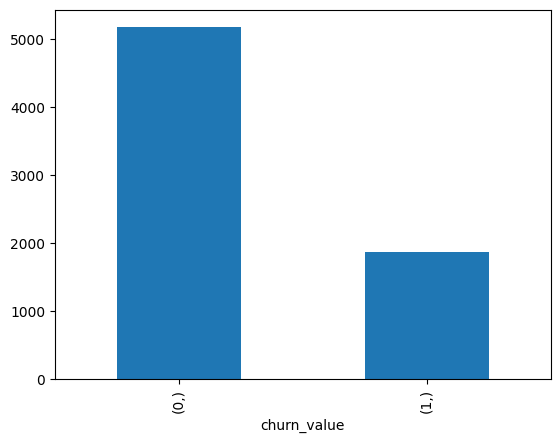

In [26]:
y.value_counts().plot.bar()

In [28]:
y.value_counts()

churn_value
0              5174
1              1869
Name: count, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
logistic_regression = LogisticRegression(random_state=123, max_iter=1000)
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier(estimator=logistic_regression)


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9540937056318031

In [38]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote_sampler = SMOTE(random_state=123)
over_sampler = RandomOverSampler()
under_sampler = RandomUnderSampler()

In [46]:
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
X_over, y_over = over_sampler.fit_resample(X_train, y_train)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)
y_smo.value_counts()

churn_value
0              3612
1              3612
Name: count, dtype: int64

In [ ]:
models=[("logistic regression", logistic_regression), ("Random forest", random_forest), ("ada boost", ada_boost)]
splits = [("normal", X_train, y_train), ("SMOTE", X_smo, y_smo), ("Over", X_over, y_over), ("Under", X_under, y_under)]
results = []
print("unbalanced:")
for name, model in models:
    for split_name, X_, y_ in splits:
        print(f"{name} --> {split_name}")
        model.fit(X_, y_)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, fbeta, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
        auc = roc_auc_score(y_test, y_pred)
        result = {"model":name, "sampling type":split_name, "accuracy": accuracy, "precision": precision, "recall": recall, "fscore": fbeta, "AUC": auc}
        results.append(result)
df_results = pd.DataFrame(results)
df_results

unbalanced:
logistic regression --> normal


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


logistic regression --> SMOTE


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


logistic regression --> Over


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


logistic regression --> Under


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random forest --> normal


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random forest --> SMOTE


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random forest --> Over


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random forest --> Under


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ada boost --> normal


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ada boost --> SMOTE


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ada boost --> Over


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ada boost --> Under


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,model,sampling type,accuracy,precision,recall,fscore,AUC
0,logistic regression,normal,0.939423,0.886654,0.880218,0.883424,0.920263
1,logistic regression,SMOTE,0.925225,0.828047,0.900181,0.862609,0.917120
2,logistic regression,Over,0.916706,0.794349,0.918330,0.851852,0.917232
3,logistic regression,Under,0.934690,0.852991,0.905626,0.878521,0.925284
4,Random forest,normal,0.955513,0.947162,0.878403,0.911488,0.930559
5,Random forest,SMOTE,0.955513,0.931947,0.894737,0.912963,0.935845
6,Random forest,Over,0.952201,0.916667,0.898367,0.907424,0.934779
7,Random forest,Under,0.946995,0.871404,0.934664,0.901926,0.943004
8,ada boost,normal,0.939423,0.886654,0.880218,0.883424,0.920263
9,ada boost,SMOTE,0.925225,0.828047,0.900181,0.862609,0.917120
